In [1]:
import numpy as np
import matplotlib.pyplot as plt

def pgm_viewer(x):
    image = open(x,'rb')
    header1 = image.readline()
    header2 = image.readline()
    header3 = image.readline()
    header4 = image.readline()
    pixel_data = image.read() #pixel data
    pgmHeader = header1  + header2  + header3  + header4
    header3 = header3.decode() #byte to string
    header3 = header3.split(" ") # Splitting height and width values in str
    column = int(header3[0])
    row = int(header3[1])
    
    data = list(pixel_data) # Converting bytearray to list to manipulate data
    data = np.array(data)
    imag = np.reshape(data,(row,column))
    #y = bytearray(pixel_data_list) # Converting back to bytearray
    plt.figure()
    plt.imshow(imag, cmap="gray",vmax=255,vmin=0)
    plt.colorbar()

In [10]:
import numpy as np
import math
from scipy.fft import fft,ifft
import warnings

warnings.filterwarnings("ignore") # For ignoring warnings

def my2Dfft(pgm_file):
    image = open(pgm_file,'rb')
    header1 = image.readline()
    header2 = image.readline()
    header3 = image.readline()
    header4 = image.readline()
    pixel_data = image.read() #pixel data
    pgmHeader = header1  + header2  + header3  + header4
    header3 = header3.decode() #byte to string
    header3 = header3.split(" ") # Splitting height and width values in str
    column = int(header3[0])
    row = int(header3[1])
    
    data = list(pixel_data) # Converting bytearray to list to manipulate data
    data = np.array(data)
    imag = np.reshape(data,(row,column))
    
    #for i in range(0,row):
    #    for j in range(0,column):
    #        imag[i][j] = imag[i][j] * pow(-1,i+j)
            
    fft_f = np.zeros((row,column))
    
    for i in range(0,row):
        fft_f[i][:] = fft(imag[:][i],row)
    fft_f = fft_f.T
    
    for i in range(0,column):
        fft_f[i][:] = fft(fft_f[:][i],row)
    fft_f = fft_f.T
    
    fft_f = abs(fft_f)
    
    plt.figure()
    plt.imshow(fft_f,cmap='gray')
    plt.colorbar()
    plt.xlabel('Fig 1.2: Spectrum of the original image')
    
    fft_f = np.fft.fftshift(fft_f)
    
    plt.figure()
    plt.imshow(fft_f,cmap='gray')
    plt.colorbar()
    plt.xlabel('Fig 1.3: Shifted Spectrum')
    
    for i in range(0,row):
        for j in range(0,column):
            fft_f[i][j] = math.log(fft_f[i][j] + 1)
    
    plt.figure()
    plt.imshow(fft_f,cmap='gray')
    plt.colorbar()
    plt.xlabel('Fig 1.4: Log Transformed Spectrum')

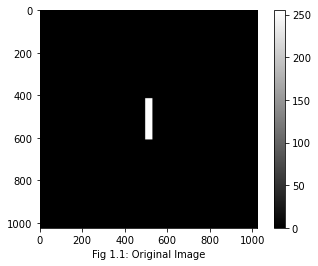

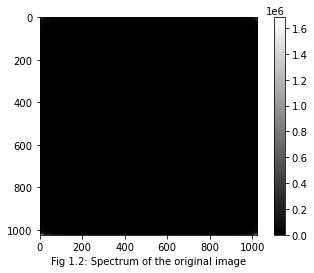

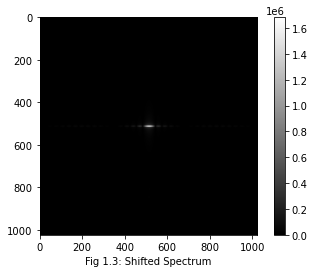

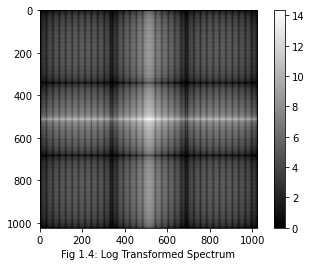

In [11]:
pgm_viewer('Fig0424(a)(rectangle).pgm')
plt.xlabel("Fig 1.1: Original Image")
my2Dfft('Fig0424(a)(rectangle).pgm')

In [13]:
import numpy as np
from scipy.fft import fft,ifft

def my2Dfft(data,row,column):
    
    data = np.array(data)
    imag = np.reshape(data,(row,column))

    fft_f = np.zeros((row,column))
    
    for i in range(0,row):
        fft_f[i][:] = fft(imag[:][i],row)
    fft_f = fft_f.T
    
    for i in range(0,column):
        fft_f[i][:] = fft(fft_f[:][i],column)
    fft_f = fft_f.T

    return fft_f

In [14]:
def my2Difft(pgm_file):
    image = open(pgm_file,'rb')
    header1 = image.readline()
    header2 = image.readline()
    header3 = image.readline()
    header4 = image.readline()
    pixel_data = image.read() #pixel data
    pgmHeader = header1  + header2  + header3  + header4
    header3 = header3.decode() #byte to string
    header3 = header3.split(" ") # Splitting height and width values in str
    column = int(header3[0])
    row = int(header3[1])
    data = list(pixel_data) # Converting bytearray to list to manipulate data
    data = np.array(data)
    data = np.reshape(data,(row,column))
    
    fft_f= my2Dfft(data,row,column)
    
    f_conjugate = (my2Dfft(np.conj(fft_f),row,column)) / (row*column)
    f = np.conj(f_conjugate)
    
    plt.figure()
    plt.imshow(f,cmap='gray')
    plt.colorbar()

Text(0.5, 0, 'Fig 2: Inverse FFT of the spectrum')

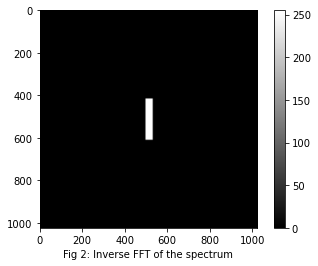

In [15]:
# Inverse FFT
my2Difft('Fig0424(a)(rectangle).pgm')
plt.xlabel('Fig 2: Inverse FFT of the spectrum')